### Modelling statistical learning

To explore the effect of sleep on statistical learning, Durrant et al. (2011) constructed two types of sequence, both made up of regular tones at differing frequencies. One type had a structure in which the preceding two tones determined the next, except for a few transitions which were random to avoid repetition. The other type was the reverse – most transitions were random. After listening to a structured sequence, participants were tested on their ability distinguish short structured and unstructured sequences. Delayed recall was then tested, after a night’s sleep for one group, and after a waking rest for the other. Durrant et al. (2011) found that sleep improved performance more than waking rest, suggesting systems consolidation promotes statistical learning.

Here, we generate a set of sequences based on the transition structure in Durrant et al. (2011). A model with the GPT-2 architecture is trained from scratch on the structured sequences only. At the end of each epoch of the training, the perplexity is calculated for a two test sets of structured and unstructured sequences. We find that the difference in perplexity of these two sets increases over time, corresponding to improved ability to distinguish them. In addition, outputs from the trained model are structured in the same way as the training data.

Tested with conda_pytorch_latest_p36 kernel in AWS SageMaker.

#### Installation:

In [ ]:
!pip install simpletransformers

#### Imports:

In [11]:
import sys
sys.path.append('../scripts/')

import pandas as pd
import random
import logging
from random import shuffle
from matplotlib import pyplot as plt
from statistical_learning_utils import *
from gpt import GPT
import os
import glob
import evaluate
import numpy as np

In [4]:
def get_random_sequence():
    start = [random.randint(1,5),random.randint(1,5)]
    for i in range(50):
        next_val = random.randint(1,5)
        start.append(next_val)
    return ','.join([str(i) for i in start])

text_file = open("train.txt", "w")
walks = [get_sequence() for i in range(2000)]
shuffle(walks)
n = text_file.write('\n'.join(walks))
text_file.close()

text_file = open("val.txt", "w")
walks = [get_sequence() for i in range(100)]
shuffle(walks)
n = text_file.write('\n'.join(walks))
text_file.close()

text_file = open("structured_test.txt", "w")
walks = [get_sequence() for i in range(100)]
shuffle(walks)
n = text_file.write('\n'.join(walks))
text_file.close()

text_file = open("unstructured_test.txt", "w")
walks = [get_random_sequence() for i in range(100)]
shuffle(walks)
n = text_file.write('\n'.join(walks))
text_file.close()

#### Train generative model

Train GPT-2 from scratch on dataset created above.

In [6]:
structured_test_file = "structured_test.txt"
unstructured_test_file = "unstructured_test.txt"

all_unstructured = []
all_structured = []

for trial in range(3):

    !rm -rf durrant_{trial}
    !mkdir durrant_{trial}

    # Train the model
    gpt = GPT(vocab_size=10)
    model = gpt.train(segmented_sequence_list=[], 
                      best_model_dir=f'durrant_{trial}', 
                      train_file="train.txt", 
                      test_file="val.txt", 
                      eps=3,
                      seed=trial)

INFO:simpletransformers.language_modeling.language_modeling_model: Training of None tokenizer complete. Saved to durrant_0.
INFO:simpletransformers.language_modeling.language_modeling_model: Training language model from scratch


INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_train.txt
INFO:simpletransformers.language_modeling.language_modeling_model: Training started


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.7178437032817323, 'perplexity': tensor(2.0500)}
INFO:simpletransformers.language_modeling.language_modeling_model: No improvement in eval_loss
INFO:simpletransformers.language_modeling.language_modeling_model: Current step: 1
INFO:simpletransformers.language_modeling.language_modeling_model: Early stopping patience: 3


Running Epoch 1 of 3:   0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.6164242393440671, 'perplexity': tensor(1.8523)}
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENI

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.3836755907094037, 'perplexity': tensor(1.4677)}


Running Epoch 2 of 3:   0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.3586726470126046, 'perplexity': tensor(1.4314)}
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENI

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.35270849974067126, 'perplexity': tensor(1.4229)}
INFO:simpletransformers.language_modeling.language_modeling_model: Training of gpt2 model complete. Saved to durrant_0.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TO

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_train.txt
INFO:simpletransformers.language_modeling.language_modeling_model: Training started


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.7319192952579923, 'perplexity': tensor(2.0791)}
INFO:simpletransformers.language_modeling.language_modeling_model: No improvement in eval_loss
INFO:simpletransformers.language_modeling.language_modeling_model: Current step: 1
INFO:simpletransformers.language_modeling.language_modeling_model: Early stopping patience: 3


Running Epoch 1 of 3:   0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.6447692837244199, 'perplexity': tensor(1.9055)}
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENI

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.3929987439402827, 'perplexity': tensor(1.4814)}


Running Epoch 2 of 3:   0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.3679747980685882, 'perplexity': tensor(1.4448)}
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENI

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.35388224985864425, 'perplexity': tensor(1.4246)}
INFO:simpletransformers.language_modeling.language_modeling_model: Training of gpt2 model complete. Saved to durrant_1.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TO

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_train.txt
INFO:simpletransformers.language_modeling.language_modeling_model: Training started


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.764344181543515, 'perplexity': tensor(2.1476)}
INFO:simpletransformers.language_modeling.language_modeling_model: No improvement in eval_loss
INFO:simpletransformers.language_modeling.language_modeling_model: Current step: 1
INFO:simpletransformers.language_modeling.language_modeling_model: Early stopping patience: 3


Running Epoch 1 of 3:   0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.6460511886779173, 'perplexity': tensor(1.9080)}
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENI

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.39780217427530407, 'perplexity': tensor(1.4885)}


Running Epoch 2 of 3:   0%|          | 0/1634 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if p

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.3717210466663043, 'perplexity': tensor(1.4502)}
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENI

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_val.txt
INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.3501984546030009, 'perplexity': tensor(1.4193)}
INFO:simpletransformers.language_modeling.language_modeling_model: Training of gpt2 model complete. Saved to durrant_2.


In [22]:
for trial in range(3):    
    
    perplexity_structured = []
    perplexity_unstructured = []
    
    for ep in [1, 2, 3]:
        pattern = os.path.join(f'./durrant_{trial}', f'*-epoch-{ep}')
        model_dir = glob.glob(pattern)[0]

        with open(structured_test_file, 'r') as file:
            structured_test_examples = file.readlines()
        results = perplexity.compute(model_id=model_dir,
                             add_start_token=False,
                             predictions=structured_test_examples)['mean_perplexity']
        perplexity_structured.append(results)

        with open(unstructured_test_file, 'r') as file:
            unstructured_test_examples = file.readlines()
        results = perplexity.compute(model_id=model_dir,
                             add_start_token=False,
                             predictions=unstructured_test_examples)['mean_perplexity']
        perplexity_unstructured.append(results)

    all_unstructured.append(perplexity_unstructured)
    all_structured.append(perplexity_structured)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Average structured perplexity: [2.16004028 1.54694131 1.49408756]
SEM structured perplexity: [0.04140476 0.00494491 0.0048766 ]
Average unstructured perplexity: [3.03807857 4.4017213  5.07222897]
SEM unstructured perplexity: [0.11834019 0.05630041 0.06660907]


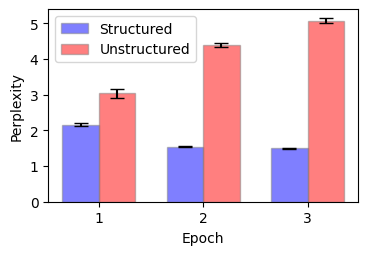

In [40]:
# Convert lists to numpy arrays for easier computation
structured_array = np.array(all_structured)
unstructured_array = np.array(all_unstructured)

# Calculate the average perplexity for each epoch across the three trials
avg_structured = np.mean(structured_array, axis=0)
avg_unstructured = np.mean(unstructured_array, axis=0)

# Calculate the SEM for each epoch across the three trials
sem_structured = np.std(structured_array, axis=0) #/ np.sqrt(structured_array.shape[0])
sem_unstructured = np.std(unstructured_array, axis=0) #/ np.sqrt(unstructured_array.shape[0])

# Print the averages and SEM
print("Average structured perplexity:", avg_structured)
print("SEM structured perplexity:", sem_structured)
print("Average unstructured perplexity:", avg_unstructured)
print("SEM unstructured perplexity:", sem_unstructured)

# Define the number of epochs
epochs = [1, 2, 3]

# Create the bar chart
fig, ax = plt.subplots(figsize=(4, 2.5))

# Bar width
bar_width = 0.35

# Set positions of the bars on the x-axis
r1 = np.arange(len(epochs))
r2 = [x + bar_width for x in r1]

# Create bars for structured perplexity with error bars
ax.bar(r1, avg_structured, color='b', alpha=0.5, width=bar_width, yerr=sem_structured, capsize=5, edgecolor='grey', label='Structured')

# Create bars for unstructured perplexity with error bars
ax.bar(r2, avg_unstructured, color='r', alpha=0.5, width=bar_width, yerr=sem_unstructured, capsize=5, edgecolor='grey', label='Unstructured')

# Add labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Perplexity')
ax.set_xticks([r + bar_width / 2 for r in range(len(epochs))])
ax.set_xticklabels(epochs)

# Add legend
ax.legend()

# Show the plot
plt.savefig('perplexities.png', dpi=500)
plt.show()


#### Plot perplexity against time

In [42]:
gpt = GPT(base_model='durrant_0', base_model_name='gpt2')
data = ""
for num in range(50):
    for i in range(1, 6):
        out = gpt.continue_input(str(i), do_sample=True, temperature=0.1)
        data += out

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

'1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,2,4,4,2,5,5,1,3,3,3,3,1,2,3,3,1,3,2,3,3,1,2,3,3,2,2,2,2,2,2,4,2,4,2,4,5,2,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,3,3,3,3,3,1,3,3,1,1,2,2,2,2,2,4,2,2,4,5,3,2,3,2,5,3,3,3,1,3,1,3,1,2,3,3,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,3,5,3,5,4,4,4,5,3,5,4,4,4,4,4,3,4,5,4,3,4,5,5,2,2,4,4,3,4,3,5,4,5,5,2,2,1,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,2,2,4,2,5,1,2,3,3,1,3,1,3,2,2,2,2,2,4,2,4,2,2,5,5,1,3,1,2,3,3,3,3,3,3,1,1,3,2,2,3,2,3,2,2,2,2,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,1,5,5,5,5,5,3,5,3,5,5,4,4,4,2,4,4,4,4,3,4,3,5,4,5,3,4,5,4,3,5,4,5,4,5,2,4

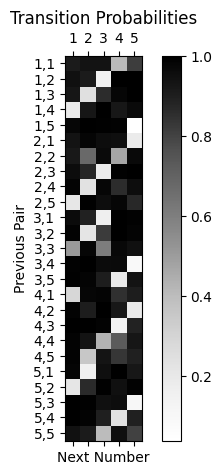

In [43]:
data_list = [int(x) for x in data.split(',') if x]

# Initialize a dictionary to hold the transition counts
transition_counts = {((i, j), k): 0 for i in range(1, 6) for j in range(1, 6) for k in range(1, 6)}

# Populate the transition counts
for i in range(len(data_list) - 2):
    prev_pair = (data_list[i], data_list[i+1])
    next_num = data_list[i+2]
    transition_counts[(prev_pair, next_num)] += 1

# Calculate probabilities from counts
transition_probabilities = {}
for key, value in transition_counts.items():
    prev_pair = key[0]
    total_transitions = sum([transition_counts[(prev_pair, k)] for k in range(1, 6)])
    if total_transitions > 0:
        transition_probabilities[key] = value / total_transitions
    else:
        transition_probabilities[key] = 0

# Prepare data for plotting
plot_data = np.zeros((25, 5))  # 25 possible pairs and 5 possible next numbers
for i, pair in enumerate(transition_counts.keys()):
    y_index = (pair[0][0] - 1) * 5 + (pair[0][1] - 1)
    x_index = pair[1] - 1
    plot_data[y_index, x_index] = 1 - transition_probabilities[pair]

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
cax = ax.matshow(plot_data, cmap='Greys')

# Set ticks
ax.set_xticks(range(5))
ax.set_xticklabels(range(1, 6))
ax.set_yticks(range(25))
ax.set_yticklabels([f'{i//5+1},{i%5+1}' for i in range(25)])

ax.set_xlabel('Next Number')
ax.set_ylabel('Previous Pair')
ax.set_title('Transition Probabilities')

plt.colorbar(cax)
plt.savefig('trps.png', dpi=500)
plt.show()